In [57]:
__author__ = 'dmp'
%pylab inline
import numpy as np
import pylab as pl
import pandas as pd
#import kmseg
from sklearn.cluster import KMeans
import geopandas as gp
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans
import json
import os
import datetime
import scipy
import zipfile #i am not giving it a name cause i intend to use it only once
from astropy.table import Table, Column
np.random.seed(1)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [58]:
Data = pd.read_csv('FDNY_Monthly_Response_Times.csv')
#Data

In [59]:
#Format Response Time
Data.AVERAGERESPONSETIME = Data.apply(lambda row: int(row['AVERAGERESPONSETIME'][0])*60 + 
                                      int(row['AVERAGERESPONSETIME'][2:]), axis = 1)


In [60]:
#Format Date
Data.YEARMONTH = Data.apply(lambda row: datetime.datetime.strptime(str(row['YEARMONTH']), '%Y%m'), axis = 1)

In [61]:
#Data

In [62]:
#Filter out only Structural Fires and Non Structural Fires
#structural fire data
FireDataStructural = Data[(Data.INCIDENTCLASSIFICATION == 'Structural Fires')]
#nonstructural fire data
FireDataNonStructural = Data[(Data.INCIDENTCLASSIFICATION == 'Non Structural Fires')]
#overall fire data
FireData = pd.concat([FireDataStructural, FireDataNonStructural])

In [63]:
#Sort Each Fire Data File by Borough and City Wide

SIStructural = FireDataStructural[FireDataStructural.INCIDENTBOROUGH == 'Staten Island']
print SIStructural
BKStructural = FireDataStructural[FireDataStructural.INCIDENTBOROUGH == 'Brooklyn']
BXStructural = FireDataStructural[FireDataStructural.INCIDENTBOROUGH == 'Bronx']
QNStructural = FireDataStructural[FireDataStructural.INCIDENTBOROUGH == 'Queens']
MNStructural = FireDataStructural[FireDataStructural.INCIDENTBOROUGH == 'Manhattan']
CWStructural = FireDataStructural[FireDataStructural.INCIDENTBOROUGH == 'Citywide']


SINonStructural = FireDataNonStructural[FireDataNonStructural.INCIDENTBOROUGH == 'Staten Island']
BKNonStructural = FireDataNonStructural[FireDataNonStructural.INCIDENTBOROUGH == 'Brooklyn']
BXNonStructural = FireDataNonStructural[FireDataNonStructural.INCIDENTBOROUGH == 'Bronx']
QNNonStructural = FireDataNonStructural[FireDataNonStructural.INCIDENTBOROUGH == 'Queens']
MNNonStructural = FireDataNonStructural[FireDataNonStructural.INCIDENTBOROUGH == 'Manhattan']
CWNonStructural = FireDataNonStructural[FireDataNonStructural.INCIDENTBOROUGH == 'Citywide']

     YEARMONTH INCIDENTCLASSIFICATION INCIDENTBOROUGH  INCIDENTCOUNT  \
3   2009-07-01       Structural Fires   Staten Island             90   
45  2009-08-01       Structural Fires   Staten Island             80   
87  2009-09-01       Structural Fires   Staten Island            103   
129 2009-10-01       Structural Fires   Staten Island             92   
171 2009-11-01       Structural Fires   Staten Island             97   
213 2009-12-01       Structural Fires   Staten Island            130   
255 2010-01-01       Structural Fires   Staten Island             91   
297 2010-02-01       Structural Fires   Staten Island             76   
339 2010-03-01       Structural Fires   Staten Island            131   
381 2010-04-01       Structural Fires   Staten Island            102   
423 2010-05-01       Structural Fires   Staten Island            101   
465 2010-06-01       Structural Fires   Staten Island             93   
507 2010-07-01       Structural Fires   Staten Island           

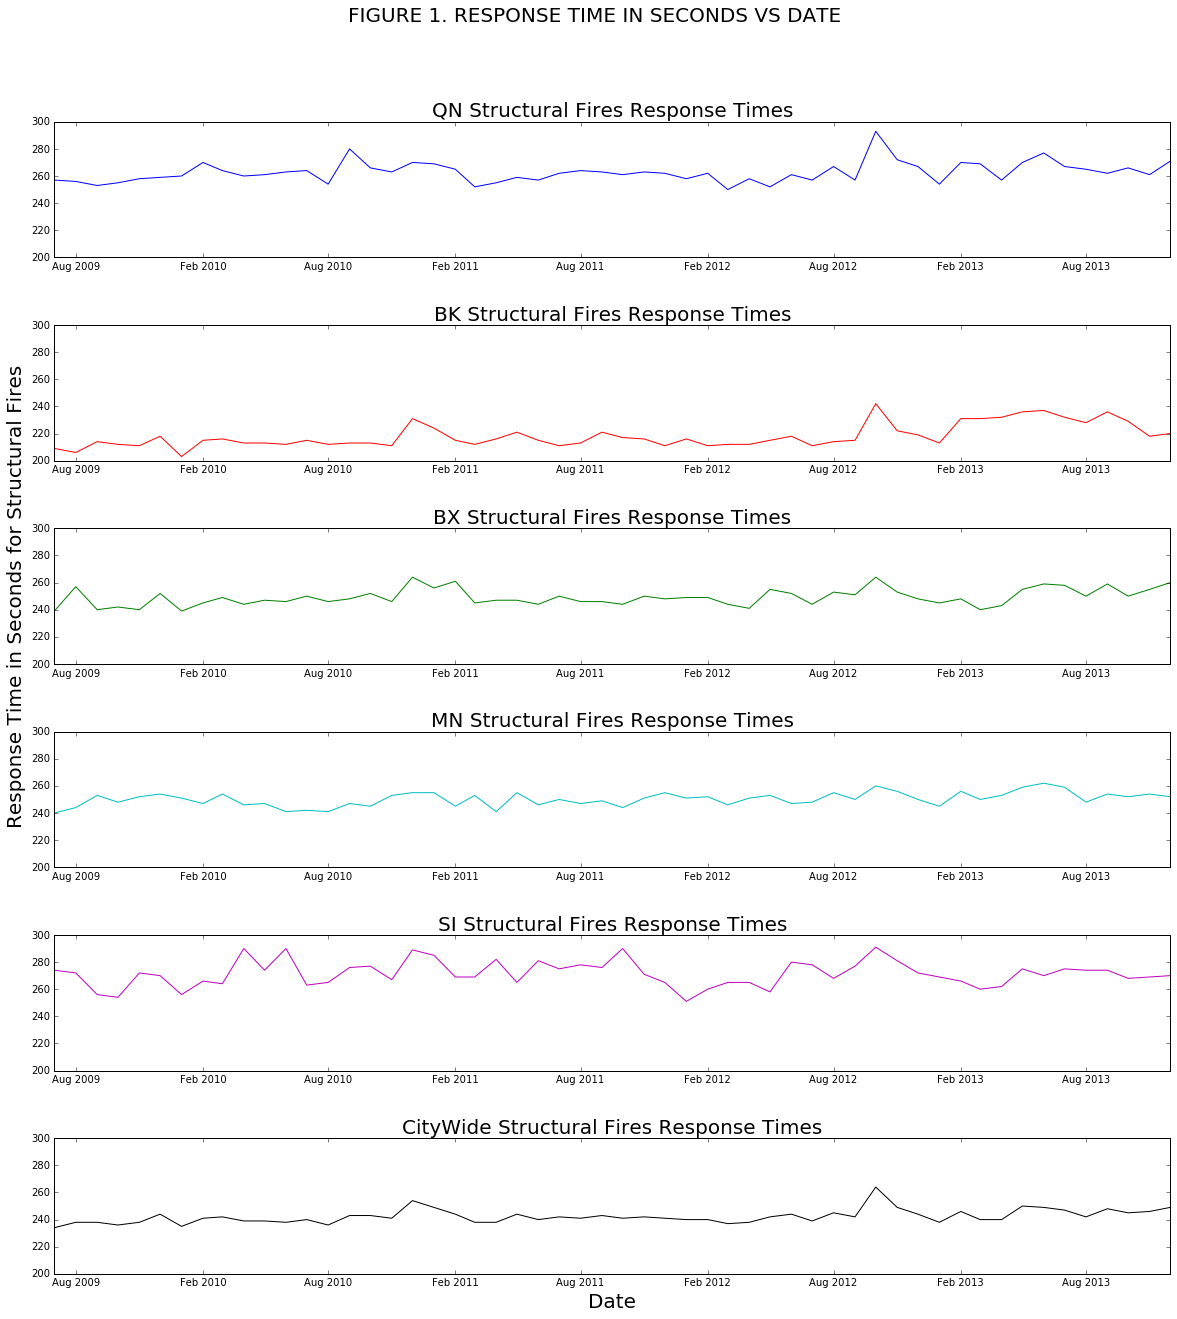

In [72]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(6, 1, 1)
bx = fig.add_subplot(6, 1, 2, sharex=ax, sharey=ax)
cx = fig.add_subplot(6, 1, 3, sharex=ax, sharey=ax)
dx = fig.add_subplot(6, 1, 4, sharex=ax, sharey=ax)
ex = fig.add_subplot(6, 1, 5, sharex=ax, sharey=ax)
fx = fig.add_subplot(6, 1, 6, sharex=ax, sharey=ax)

ax.plot(QNStructural.YEARMONTH.values, QNStructural.AVERAGERESPONSETIME, 'b')
ax.set_title('QN Structural Fires Response Times', fontsize = 20)
bx.plot(BKStructural.YEARMONTH.values, BKStructural.AVERAGERESPONSETIME, 'r')
bx.set_title('BK Structural Fires Response Times', fontsize = 20)
cx.plot(BXStructural.YEARMONTH.values, BXStructural.AVERAGERESPONSETIME, 'g')
cx.set_title('BX Structural Fires Response Times', fontsize = 20)
dx.plot(MNStructural.YEARMONTH.values, MNStructural.AVERAGERESPONSETIME, 'c')
dx.set_title('MN Structural Fires Response Times', fontsize = 20)
ex.plot(SIStructural.YEARMONTH.values, SIStructural.AVERAGERESPONSETIME, 'm')
ex.set_title('SI Structural Fires Response Times', fontsize = 20)
fx.plot(CWStructural.YEARMONTH.values, CWStructural.AVERAGERESPONSETIME, 'k')
fx.set_title('CityWide Structural Fires Response Times', fontsize = 20)

cx.set_ylabel('Response Time in Seconds for Structural Fires', fontsize=20)
fx.set_xlabel('Date', fontsize=20)
fig.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=.9, bottom=.1)
fig.suptitle('FIGURE 1. RESPONSE TIME IN SECONDS VS DATE', fontsize = 20)


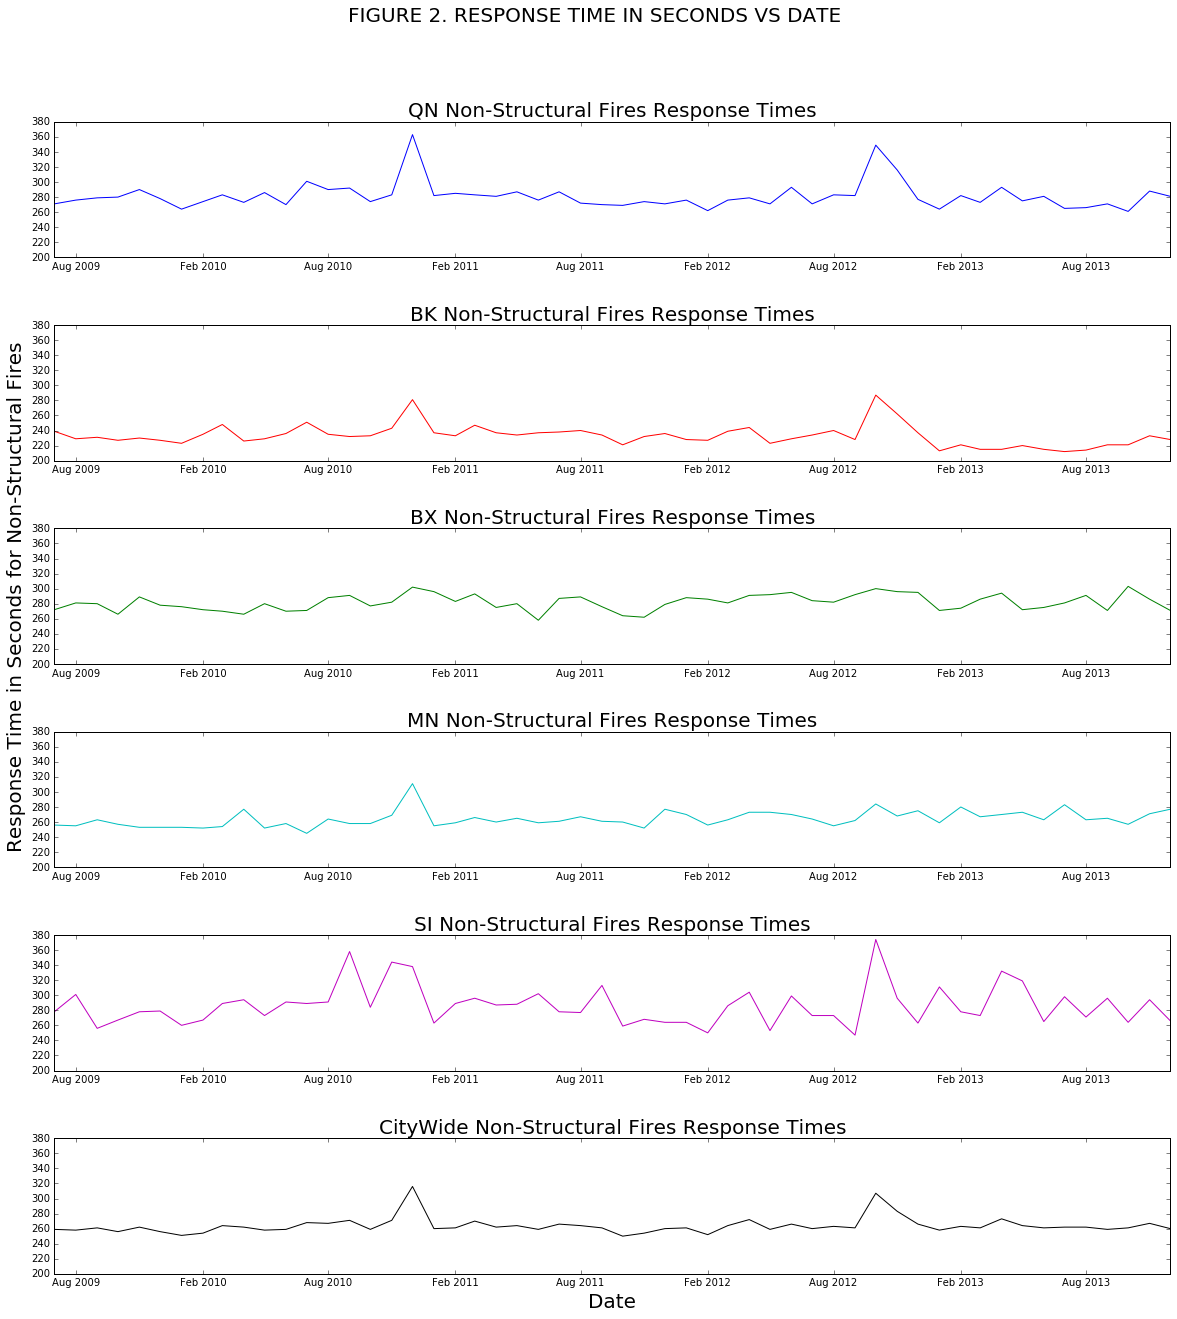

In [73]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(6, 1, 1)
bx = fig.add_subplot(6, 1, 2, sharex=ax, sharey=ax)
cx = fig.add_subplot(6, 1, 3, sharex=ax, sharey=ax)
dx = fig.add_subplot(6, 1, 4, sharex=ax, sharey=ax)
ex = fig.add_subplot(6, 1, 5, sharex=ax, sharey=ax)
fx = fig.add_subplot(6, 1, 6, sharex=ax, sharey=ax)

ax.plot(QNNonStructural.YEARMONTH.values, QNNonStructural.AVERAGERESPONSETIME, 'b')
ax.set_title('QN Non-Structural Fires Response Times', fontsize = 20)
bx.plot(BKNonStructural.YEARMONTH.values, BKNonStructural.AVERAGERESPONSETIME, 'r')
bx.set_title('BK Non-Structural Fires Response Times', fontsize = 20)
cx.plot(BXNonStructural.YEARMONTH.values, BXNonStructural.AVERAGERESPONSETIME, 'g')
cx.set_title('BX Non-Structural Fires Response Times', fontsize = 20)
dx.plot(MNNonStructural.YEARMONTH.values, MNNonStructural.AVERAGERESPONSETIME, 'c')
dx.set_title('MN Non-Structural Fires Response Times', fontsize = 20)
ex.plot(SINonStructural.YEARMONTH.values, SINonStructural.AVERAGERESPONSETIME, 'm')
ex.set_title('SI Non-Structural Fires Response Times', fontsize = 20)
fx.plot(CWNonStructural.YEARMONTH.values, CWNonStructural.AVERAGERESPONSETIME, 'k')
fx.set_title('CityWide Non-Structural Fires Response Times', fontsize = 20)

cx.set_ylabel('Response Time in Seconds for Non-Structural Fires', fontsize=20)
fx.set_xlabel('Date', fontsize=20)
fig.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=.9, bottom=.1)
fig.suptitle('FIGURE 2. RESPONSE TIME IN SECONDS VS DATE', fontsize = 20)

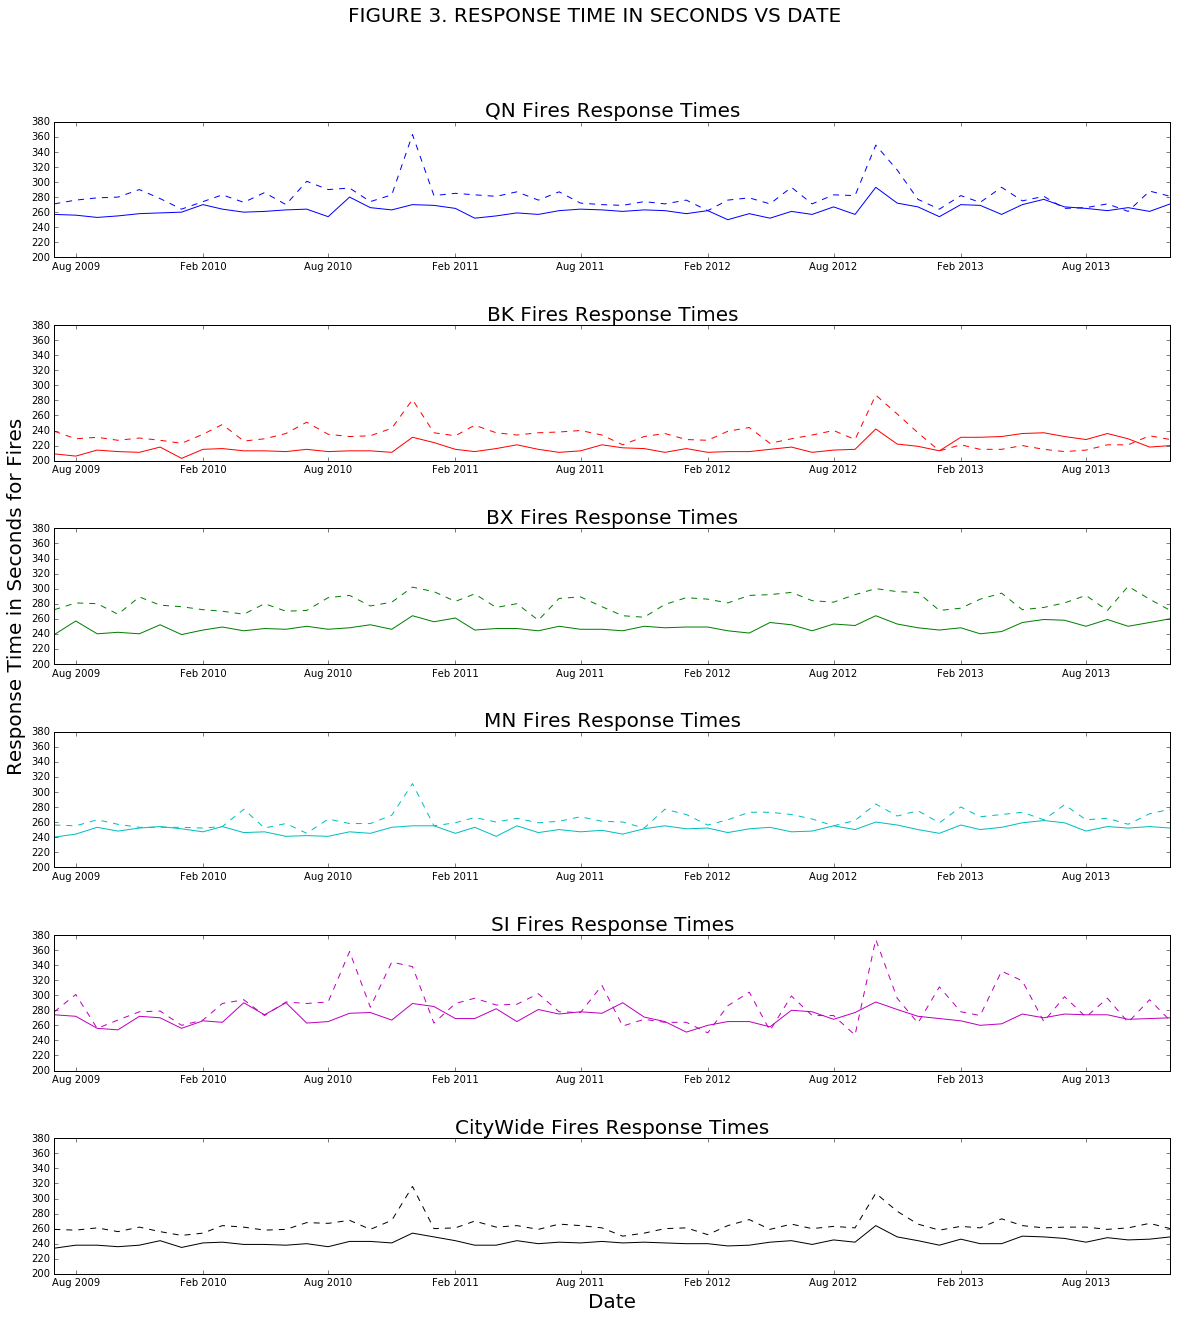

In [74]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(6, 1, 1)
bx = fig.add_subplot(6, 1, 2, sharex=ax, sharey=ax)
cx = fig.add_subplot(6, 1, 3, sharex=ax, sharey=ax)
dx = fig.add_subplot(6, 1, 4, sharex=ax, sharey=ax)
ex = fig.add_subplot(6, 1, 5, sharex=ax, sharey=ax)
fx = fig.add_subplot(6, 1, 6, sharex=ax, sharey=ax)

ax.plot(QNStructural.YEARMONTH.values, QNStructural.AVERAGERESPONSETIME, 'b')
ax.set_title('QN Fires Response Times', fontsize = 20)
bx.plot(BKStructural.YEARMONTH.values, BKStructural.AVERAGERESPONSETIME, 'r')
bx.set_title('BK Fires Response Times', fontsize = 20)
cx.plot(BXStructural.YEARMONTH.values, BXStructural.AVERAGERESPONSETIME, 'g')
cx.set_title('BX Fires Response Times', fontsize = 20)
dx.plot(MNStructural.YEARMONTH.values, MNStructural.AVERAGERESPONSETIME, 'c')
dx.set_title('MN Fires Response Times', fontsize = 20)
ex.plot(SIStructural.YEARMONTH.values, SIStructural.AVERAGERESPONSETIME, 'm')
ex.set_title('SI Fires Response Times', fontsize = 20)
fx.plot(CWStructural.YEARMONTH.values, CWStructural.AVERAGERESPONSETIME, 'k')
fx.set_title('CityWide Fires Response Times', fontsize = 20)
ax.plot(QNNonStructural.YEARMONTH.values, QNNonStructural.AVERAGERESPONSETIME, 'b--')
bx.plot(BKNonStructural.YEARMONTH.values, BKNonStructural.AVERAGERESPONSETIME, 'r--')
cx.plot(BXNonStructural.YEARMONTH.values, BXNonStructural.AVERAGERESPONSETIME, 'g--')
dx.plot(MNNonStructural.YEARMONTH.values, MNNonStructural.AVERAGERESPONSETIME, 'c--')
ex.plot(SINonStructural.YEARMONTH.values, SINonStructural.AVERAGERESPONSETIME, 'm--')
fx.plot(CWNonStructural.YEARMONTH.values, CWNonStructural.AVERAGERESPONSETIME, 'k--')


cx.set_ylabel('Response Time in Seconds for Fires', fontsize=20)
fx.set_xlabel('Date', fontsize=20)
fig.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=.9, bottom=.1)
fig.suptitle('FIGURE 3. RESPONSE TIME IN SECONDS VS DATE', fontsize = 20)

In [67]:
#Cluster Analysis

Structuralarrays = np.zeros((5, 30))

boroStructural = [QNStructural, BKStructural, BXStructural, MNStructural, SIStructural]
for i in range(len(boro)):
    Structuralarrays[i] = boro[i].AVERAGERESPONSETIME.values
    
kmeans = KMeans(n_clusters=3, n_init=100)
kmeans.fit(arrays)
StructuralFirelabels = kmeans.labels_  



NonStructuralarrays = np.zeros((5, 30))

boroNonStructural = [QNNonStructural, BKNonStructural, BXNonStructural, 
                     MNNonStructural, SINonStructural]
for i in range(len(boro)):
    NonStructuralarrays[i] = boro[i].AVERAGERESPONSETIME.values
    
kmeans = KMeans(n_clusters=3, n_init=100)
kmeans.fit(arrays)
NonStructuralFirelabels = kmeans.labels_  

In [68]:
StructuralFirelabels

array([2, 1, 0, 2, 0], dtype=int32)

In [69]:
NonStructuralFirelabels

array([0, 1, 2, 0, 2], dtype=int32)